In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [77]:
# Load the dataset
file_path = r"C:\Users\esthe\OneDrive\Desktop\marketing_campaign1 (1).xlsx"
data = pd.read_excel(file_path)

In [81]:
# Display basic information about the dataset
print("Initial Dataset Information:")
data.info()

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntS

In [83]:
print("Summary Statistics:")
data.describe()

Summary Statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [85]:
# Check for missing values
print("\nMissing values in each column:\n") 
data.isnull().sum()


Missing values in each column:



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [89]:
# Fill missing values in 'Income' with the median
data['Income'] = data['Income'].fillna(data['Income'].median())

In [97]:
# Drop rows with missing 'Year_Birth' values
data.dropna(subset=['Year_Birth'], inplace=True)

In [99]:
# Drop irrelevant columns
data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True, errors='ignore')

In [101]:
# Capping 'Age' based on 'Year_Birth'
data['Age'] = 2024 - data['Year_Birth']
data['Age'] = np.where(data['Age'] > 100, 100, data['Age'])

In [103]:
# Cap 'Income' at the 99th percentile to handle extreme outliers
income_cap = data['Income'].quantile(0.99)
data['Income'] = np.where(data['Income'] > income_cap, income_cap, data['Income'])

In [105]:
# Drop 'Year_Birth' after calculating 'Age'
data.drop('Year_Birth', axis=1, inplace=True)

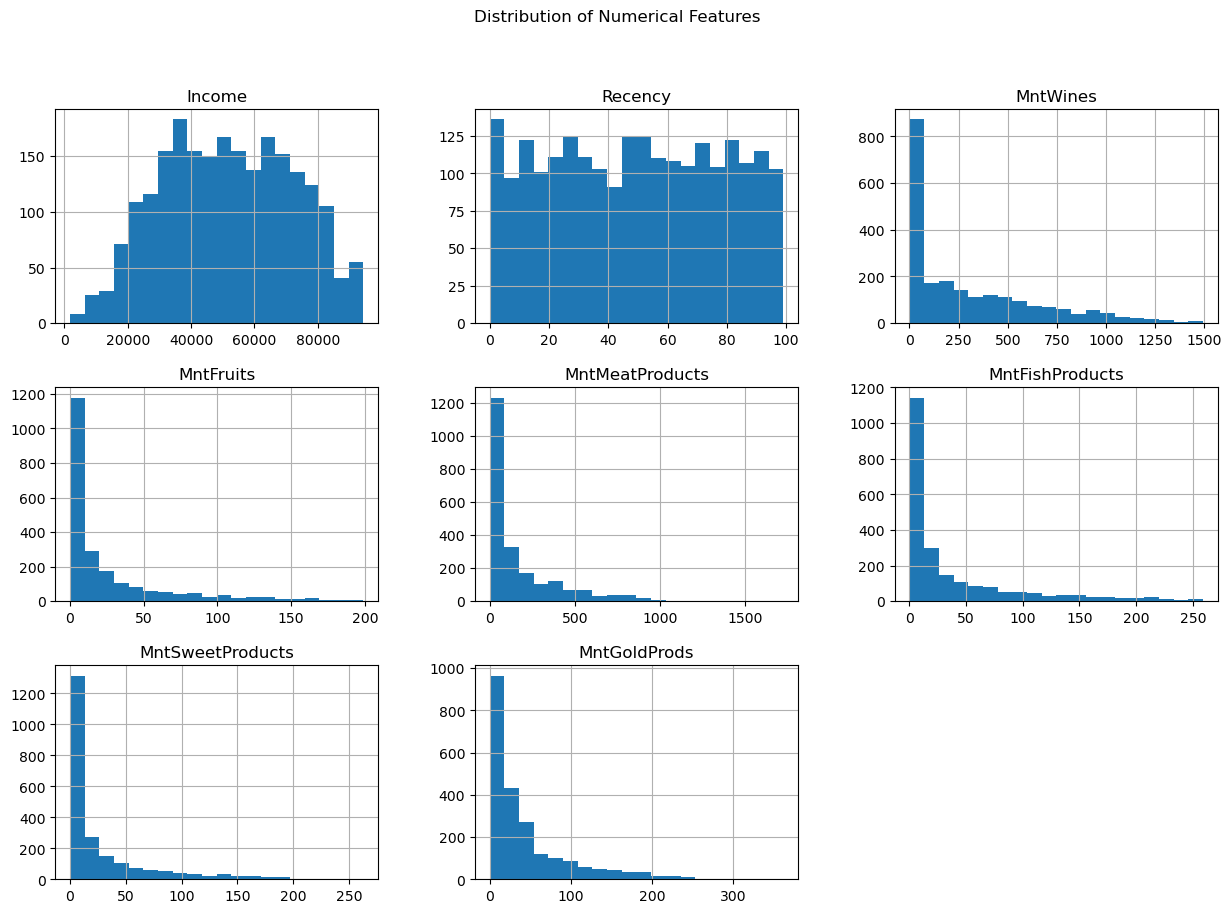

In [107]:
# Visualize distributions of numerical features
numerical_cols = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

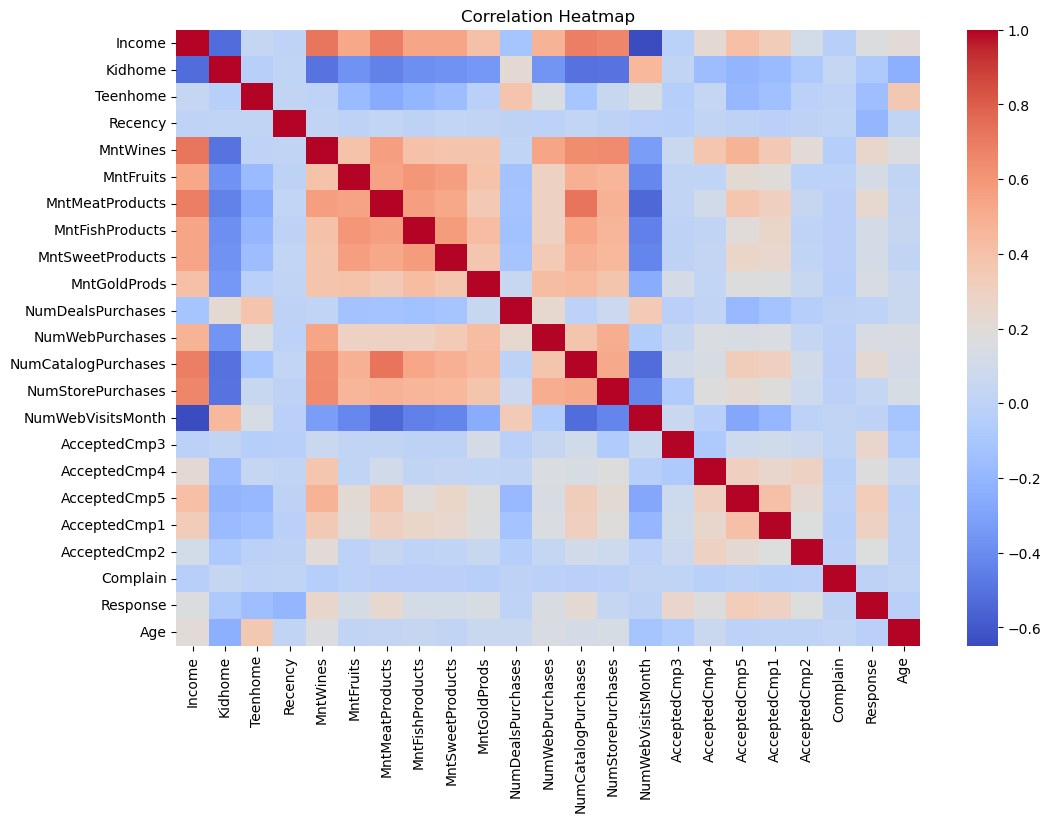

In [108]:
# Visualize the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [114]:
# Create new features
data['Total_Expenditure'] = (data['MntWines'] + data['MntFruits'] + 
                             data['MntMeatProducts'] + data['MntFishProducts'] + 
                             data['MntSweetProducts'] + data['MntGoldProds'])

In [116]:
data['Family_Size'] = data['Kidhome'] + data['Teenhome']
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data['Acceptance_Rate'] = data[campaign_cols].mean(axis=1)

In [118]:
# Binning features
data['Recency_Group'] = pd.cut(data['Recency'], bins=[-1, 30, 90, 180, 365], 
                               labels=['Very Recent', 'Recent', 'Moderate', 'Long Ago'])
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 50, 70, 100], 
                           labels=['Young', 'Middle-aged', 'Senior', 'Very Senior'])

In [120]:
# Drop the original campaign columns
data.drop(campaign_cols, axis=1, inplace=True)

In [122]:
# One-hot encoding categorical features
data = pd.get_dummies(data, columns=['Recency_Group', 'Age_Group', 'Education', 'Marital_Status'], drop_first=True)

In [124]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Income', 'Age', 'Recency', 'Total_Expenditure', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                      'NumWebVisitsMonth', 'Family_Size']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [128]:
# Determine the optimal number of clusters using the elbow method and silhouette score
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

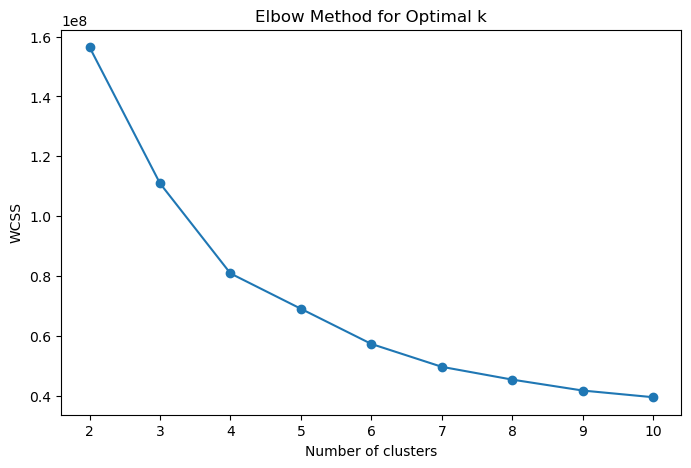

In [129]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

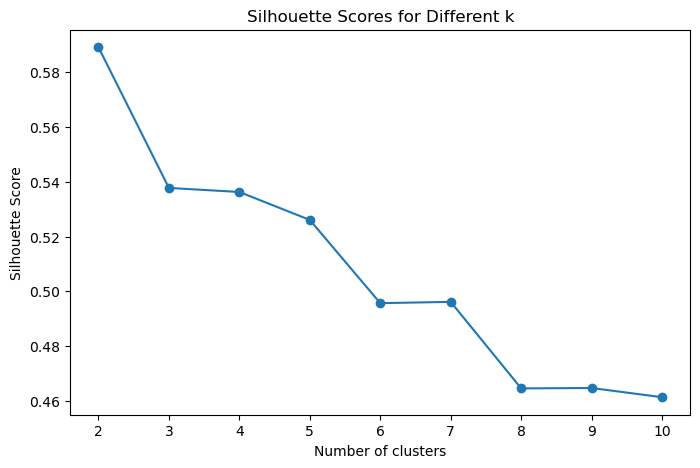

In [130]:
# Plot the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [131]:
# Choose the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

In [138]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.drop('Cluster', axis=1))
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

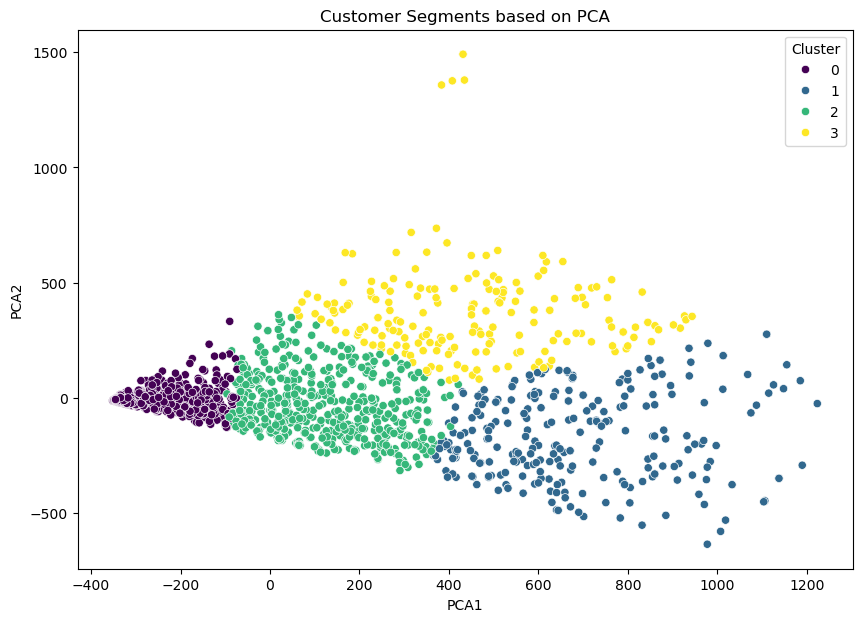

In [140]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on PCA')
plt.show()

In [142]:
data.to_csv('processed_data.csv', index=False)

In [144]:
data = pd.read_csv('processed_data.csv')